In [1]:
# we begin with importing of pandas to help with data manipulation
import pandas as pd

In [2]:
# be sure to have the csv file questselections18.csv in the same directory as this ipynb
df = pd.read_csv("~/Desktop/questselections18.csv")

In [3]:
# we begin with a simple examination of the first few rows of the dataframe
# notice that there are six columns, which I define here:
#
# id (Ordinal) - a unique identifier for each application received by QUEST in 2018
# note that applications that are received earlier have lower id scores
# some id's are missing because a student may have started an application but
# didn't submit it
#
# credits (Ratio) - an integer that is a count of the number of college credits an
# applicant has when they submit their application.  Note that the number of credits
# may be greater than zero even when a student applies in the fall semester because
# of AP or similar credits they bring to the University of Maryland
#
# gpa (Ratio) - what is the current college gpa of the applicant
#
# school (Nominal) - this can be "CMNS" or "Clark" or "Smith"
#
# score (Interval) - what is the average score of the quality of the application based on alumni
# and current student reviewers
#
# interview (Ordinal or Categorical?) - a binary variable that is '1' if the applicant is invited to come and interview
# and '0' if the applicant is not invited

df.head()

,id,credits,gpa,school,score,interview
0,1757,15,3.55,CMNS,3.5,1
1,1760,15,4.00,CMNS,4.0,1
2,1761,15,3.45,Clark,4.5,1
3,1762,18,3.40,Clark,4.5,1
4,1763,19,3.38,Smith,2.5,0


In [4]:
# descriptive statistics of the quantitative variables
df.describe()

,id,credits,gpa,score,interview
count,226.000000,226.000000,226.000000,226.000000,226.000000
mean,1976.464602,18.482301,3.606726,3.348083,0.646018
std,142.211958,8.730643,0.518318,0.865971,0.479265
min,1757.000000,0.000000,0.000000,0.000000,0.000000
25%,1861.000000,15.000000,3.460000,3.000000,0.000000
50%,1951.500000,16.000000,3.705000,3.500000,1.000000
75%,2085.750000,17.000000,3.917500,4.000000,1.000000
max,2277.000000,60.000000,4.000000,5.000000,1.000000


In [5]:
dummies = pd.get_dummies(df["school"])
df = pd.concat([df, dummies], axis=1)
df.head()

,id,credits,gpa,school,score,interview,CMNS,Clark,Smith
0,1757,15,3.55,CMNS,3.5,1,1,0,0
1,1760,15,4.00,CMNS,4.0,1,1,0,0
2,1761,15,3.45,Clark,4.5,1,0,1,0
3,1762,18,3.40,Clark,4.5,1,0,1,0
4,1763,19,3.38,Smith,2.5,0,0,0,1


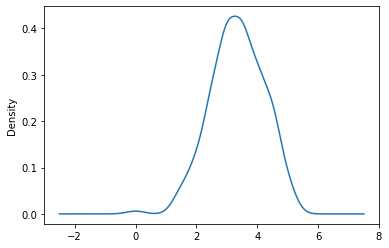

In [6]:
# a kernel density plot of the variable 'score"
# notice that it looks like a normal distribution
df["score"].plot.kde()

In [7]:
# notice from the descriptive statistics that some students have a zero gpa and some have zero credits when
# they are applying to QUEST.  Does this seem right to you?  Let's take a look at these rows using the following
# code
for index, row in df.iterrows():
    if row["gpa"] == 0:
        print ("Applicant ", row["id"], "has a zero GPA.")

Applicant  1769 has a zero GPA.
Applicant  1773 has a zero GPA.
Applicant  1922 has a zero GPA.


In [8]:
# can you write some code below that prints out all of the applicant IDs if they have zero credits?

In [9]:
# how should we handle applicants that have a zero GPA or zero credits?  There is no easy solution, is there?

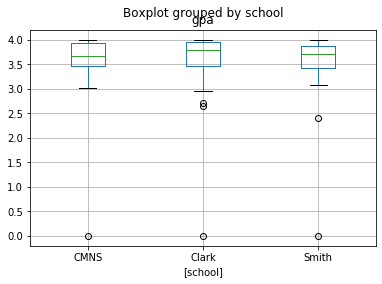

In [10]:
# let's now take a look at some interesting ways to examine the data.  We will start with the average GPAs
# for the students in each of the three colleges
boxplot = df.boxplot(column=['gpa'], by=['school'])

In [11]:
# notice that the boxplots don't look very good if you haven't taken care of the applicants with zero GPAs
# see if you can do something to fix this and redraw the boxplot

In [14]:
import statsmodels.api as sm
YVar = df[["interview"]]
XVar = sm.add_constant(df[['Clark', 'CMNS', 'gpa', 'credits', 'score']])
LogisticModel = sm.Logit(YVar, XVar)
results = LogisticModel.fit()
print(results.summary())

Optimization terminated successfully.
         Current function value: 0.419483
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:              interview   No. Observations:                  226
Model:                          Logit   Df Residuals:                      220
Method:                           MLE   Df Model:                            5
Date:                Mon, 27 Apr 2020   Pseudo R-squ.:                  0.3545
Time:                        16:47:02   Log-Likelihood:                -94.803
converged:                       True   LL-Null:                       -146.87
Covariance Type:            nonrobust   LLR p-value:                 7.085e-21
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -9.3398      1.864     -5.011      0.000     -12.993      -5.686
Clark          0.1404      0.

In [11]:
df_filtered = df[df['gpa'] > 0] 


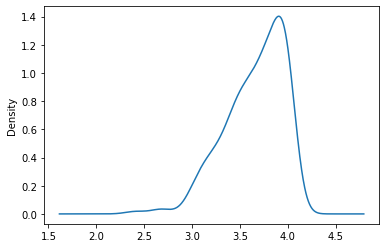

In [12]:
df_filtered['gpa'].plot.kde()

In [13]:
df_filtered['gpa'].skew()

-0.9544798519591109

In [14]:
df_filtered['gpa'].kurtosis()

0.7988453164694445

In [15]:
df_filtered.head()

,id,credits,gpa,school,score,interview,CMNS,Clark,Smith
0,1757,15,3.55,CMNS,3.5,1,1,0,0
1,1760,15,4.00,CMNS,4.0,1,1,0,0
2,1761,15,3.45,Clark,4.5,1,0,1,0
3,1762,18,3.40,Clark,4.5,1,0,1,0
4,1763,19,3.38,Smith,2.5,0,0,0,1


In [18]:
df_clark = df_filtered[df_filtered['Clark'] == 1]
df_smith = df_filtered[df_filtered['Smith'] == 1]

In [19]:
df_clark['gpa'].skew()

-1.1421415056189566

In [20]:
df_clark['gpa'].kurtosis()

0.672154120522332

In [21]:
df_smith['gpa'].skew()

-1.1123755891720295

In [22]:
df_smith['gpa'].kurtosis()

1.830517782501278

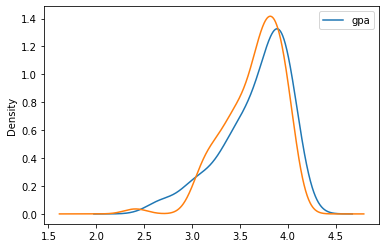

In [37]:
plt = df_clark['gpa'].plot.kde(legend='joe')
plt = df_smith['gpa'].plot.kde()

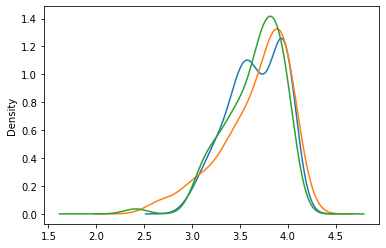

In [49]:
for label, df in df_filtered.groupby('school'):
    df['gpa'].plot(kind="kde", label=label)
plt.legend()

In [56]:
import seaborn as sns

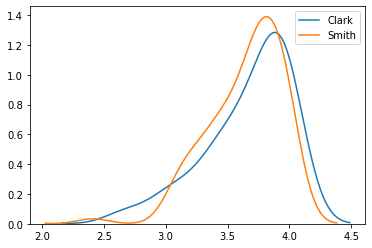

In [57]:
sns.kdeplot(df_filtered.gpa[df_filtered.school == 'Clark'],label='Clark');
sns.kdeplot(df_filtered.gpa[df_filtered.school == 'Smith'],label='Smith');

In [59]:
from scipy.stats import ttest_ind

In [62]:
cat1 = df_filtered[df_filtered['school']=='Clark']
cat2 = df_filtered[df_filtered['school']=='Smith']

ttest_ind(cat1['gpa'], cat2['gpa'])


Ttest_indResult(statistic=0.36933836649529905, pvalue=0.7123929449355173)